In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## We begin by importing the data into a Data Frame. We explore the data using the describe command for statistical information and the isnull command to see if there are any null values. 

In [15]:
# Reading in the csv file, making sure to correctly identify the index column
hitter = pd.read_csv('/Users/williamearley/Jobs/Detroit Tigers/Baseball Operations Analyst/AnalyticsQuestionnaireHitData.csv', index_col=0)

In [16]:
# Making sure we can see all of the columns
pd.set_option('display.max_columns', None)

In [17]:
# Taking a look at the data
hitter.head(3)

,PitchId,BatterId,PitcherId,PitcherHand,BatterSide,HomeTeamId,AwayTeamId,PitchCall,PitchType,ReleaseSpeed,PlateX,TrajectoryLocationY,PlateZ,StrikeZoneTop,StrikeZoneBottom,Balls,Strikes,VerticalBreak,InducedVerticalBreak,HorzBreak,VertApproachAngle,HorzApproachAngle,LaunchSpeed,LaunchAngle,LaunchSpinAxis,LaunchDirection,LaunchSpinRate,LandingPositionX,LandingPositionY,LandingPositionZ
1,1,1,1,L,R,115,119,called_strike,CH,82.951797,0.000658,1.416667,1.910587,3.340296,1.490,0,0,-2.954497,0.330031,-0.760605,-7.634186,1.087663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,1,L,R,115,119,ball,KC,79.044281,-1.247656,1.416667,1.103241,3.224827,1.490,0,1,-4.321801,-0.727824,0.403275,-9.791415,3.901629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,1,L,R,115,119,field_out,SL,87.315712,-0.270819,1.416667,2.888650,3.285000,1.487,1,1,-2.424714,0.512405,0.027676,-5.721138,2.533320,82.429787,30.821812,204.93396,10.787098,2263.124756,104.179558,295.970184,0.030403


In [12]:
# Using describe to get a sense of all the numerical columns here.
hitter.describe()

,Unnamed: 0,PitchId,BatterId,PitcherId,HomeTeamId,AwayTeamId,ReleaseSpeed,PlateX,TrajectoryLocationY,PlateZ,StrikeZoneTop,StrikeZoneBottom,Balls,Strikes,VerticalBreak,InducedVerticalBreak,HorzBreak,VertApproachAngle,HorzApproachAngle,LaunchSpeed,LaunchAngle,LaunchSpinAxis,LaunchDirection,LaunchSpinRate,LandingPositionX,LandingPositionY,LandingPositionZ
count,361.000000,361.000000,361.000000,361.000000,361.0,361.0,344.000000,344.000000,3.440000e+02,344.000000,361.000000,361.000000,361.000000,361.000000,344.000000,344.000000,344.000000,344.000000,344.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,181.000000,181.000000,10.545706,4.110803,115.0,119.0,88.532033,0.158886,1.416667e+00,2.193570,3.412856,1.589598,0.944598,0.828255,-2.488447,0.414846,-0.037986,-6.649821,-1.086627,80.303303,14.055244,190.836793,13.786665,3935.760353,21.361728,51.354795,0.002304
std,104.355961,104.355961,6.096788,3.469537,0.0,0.0,5.475517,0.837371,2.890785e-15,0.933895,0.140791,0.076132,0.932279,0.822178,0.929523,0.597822,0.719732,1.628973,2.608962,15.433611,35.622352,72.729606,82.776989,2370.566778,95.655437,140.547514,0.018597
min,1.000000,1.000000,1.000000,1.000000,115.0,119.0,74.123283,-2.130692,1.416667e+00,-0.594582,3.041359,1.361298,0.000000,0.000000,-4.827894,-0.872469,-1.500811,-11.864261,-7.002344,24.252522,-65.740181,5.367777,-177.068542,158.498016,-224.098679,-226.972198,-0.041088
25%,91.000000,91.000000,6.000000,1.000000,115.0,119.0,84.747688,-0.437725,1.416667e+00,1.593734,3.319000,1.535000,0.000000,0.000000,-2.946191,0.089531,-0.627535,-7.764636,-3.109061,70.380035,-16.798895,167.876099,-25.833710,1928.623779,-7.987665,0.420279,-0.010443
50%,181.000000,181.000000,10.000000,2.000000,115.0,119.0,89.416183,0.180974,1.416667e+00,2.279938,3.389628,1.589000,1.000000,1.000000,-2.379962,0.450848,-0.022907,-6.583649,-1.463234,78.719368,14.907848,180.000000,8.619566,3906.656738,3.022025,13.613061,0.001967
75%,271.000000,271.000000,15.000000,6.000000,115.0,119.0,92.861517,0.766123,1.416667e+00,2.831390,3.488508,1.627000,2.000000,2.000000,-1.639851,0.960715,0.609859,-5.416750,1.138017,93.079720,42.163719,226.326508,65.779510,5636.345703,63.701733,142.914322,0.017236
max,361.000000,361.000000,25.000000,12.000000,115.0,119.0,99.388306,1.930915,1.416667e+00,4.541311,3.995971,1.864249,3.000000,2.000000,-1.040028,1.536205,1.266860,-2.770010,5.925198,108.274071,76.842041,354.859711,170.463974,7992.277344,321.235229,438.914459,0.045315


In [ ]:
# Always good to check for null values in a dataset, given a longer breakdown I would do some imputation or
# fill in the missing values. I am not going to print out these results at this time but there are some
# null values.
hitter.isnull().sum()

### Creating visualizations to communicate data and tell the story is one of my absolute favorite things to do. I kept it simple here because sometimes less is more. I am letting these stats speak for themselves in a clear, straightforward, and understandable way. This helps when breaking down data for decision makers who are less familiar with quantitative methods. 

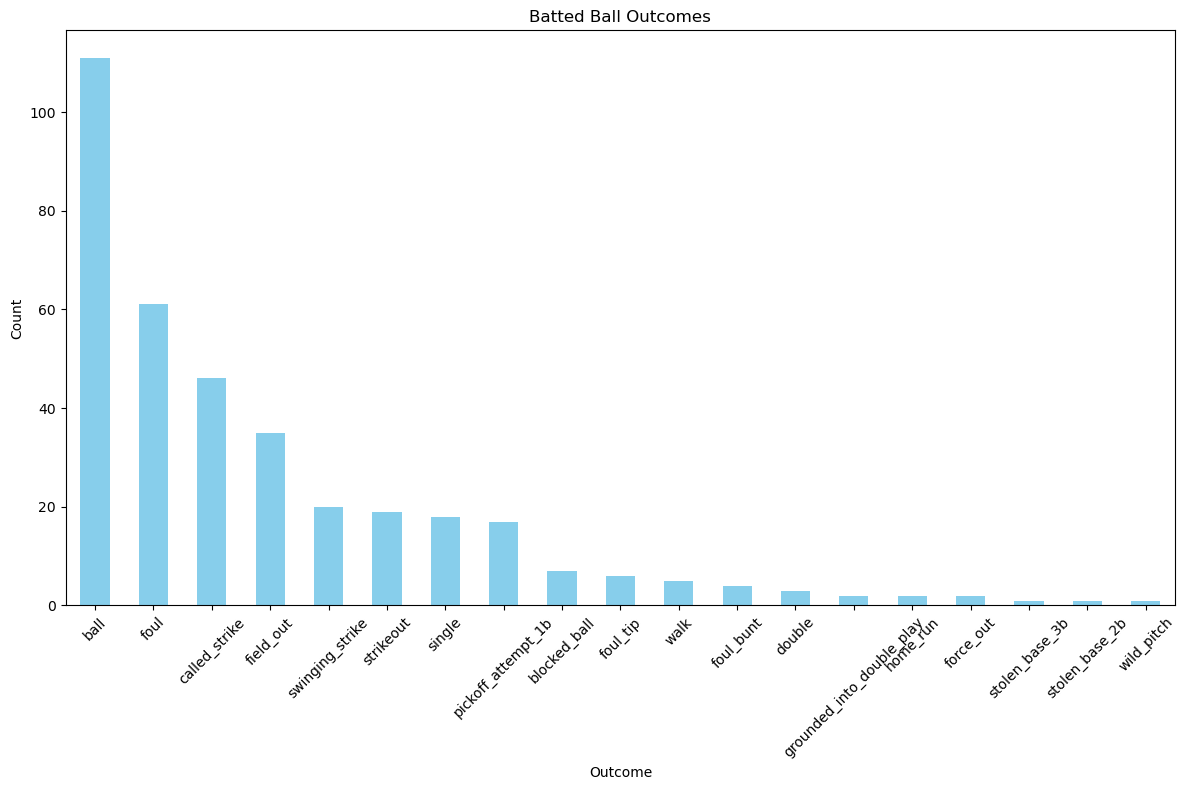

In [21]:
# Batted Ball Outcomes
batted_ball_outcomes = hitter['PitchCall'].value_counts()
plt.figure(figsize=(12, 8))
batted_ball_outcomes.plot(kind='bar', color='skyblue')
plt.title('Batted Ball Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

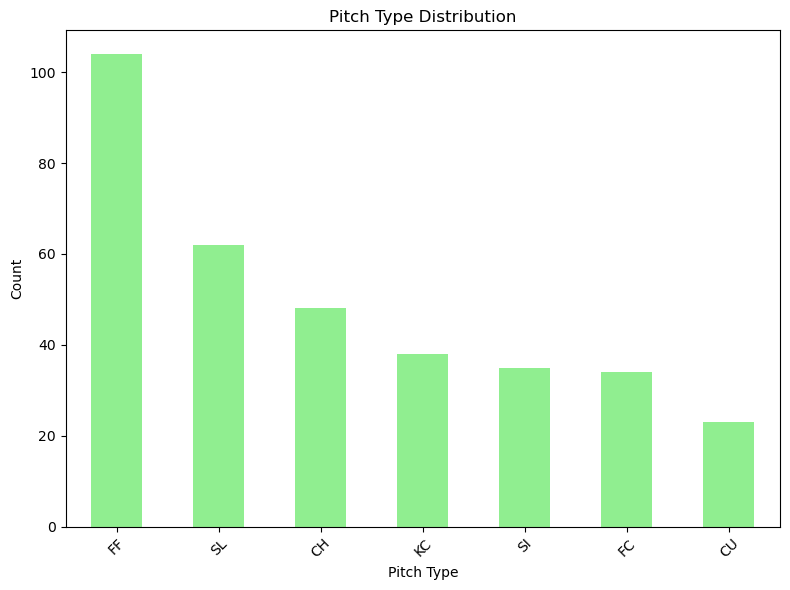

In [23]:
# Pitch Type Distribution
pitch_type_distribution = hitter['PitchType'].value_counts()
plt.figure(figsize=(8, 6))
pitch_type_distribution.plot(kind='bar', color='lightgreen')
plt.title('Pitch Type Distribution')
plt.xlabel('Pitch Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

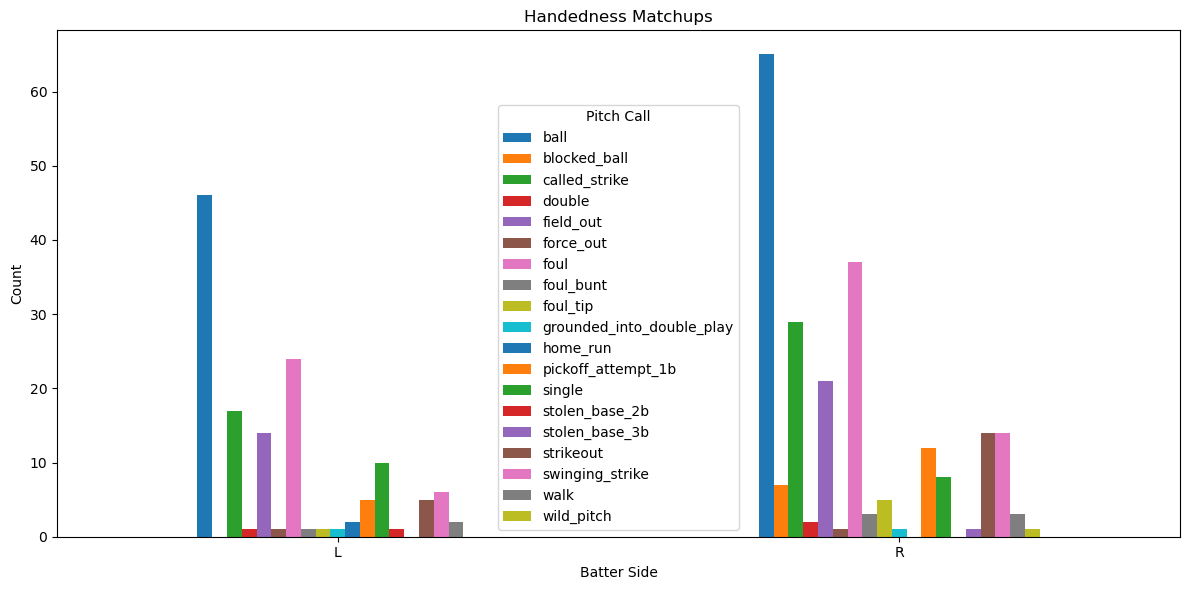

In [28]:
# Handedness Matchups
handedness_matchups = hitter.groupby('BatterSide')['PitchCall'].value_counts().unstack()
handedness_matchups.plot(kind='bar', figsize=(12, 6))
plt.title('Handedness Matchups')
plt.xlabel('Batter Side')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Pitch Call')
plt.tight_layout()
plt.show()

### Given more time, I would lean on the pybaseball package to really bring these visualizations to life.

In [27]:
from pybaseball import statcast